<a href="https://www.kaggle.com/code/emanoelcarvalholopes/cibmtr-logistic-regression-prediction?scriptVersionId=213744619" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

# Loading and Exploring the Dataset

In [2]:
train = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/train.csv')
test = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/test.csv')
sample_submission = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv")

In [3]:
train.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

### Observations:

* The target variable is efs

# Exploratory Data Analysis

In [5]:
# Statistical view of the dataset

train.describe()

,ID,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,...,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,28800.000000,24180.000000,22971.000000,25530.000000,23516.000000,21637.000000,23601.000000,24603.000000,26000.000000,26157.000000,...,28800.000000,26410.000000,24712.00000,28323.000000,27930.00000,25147.000000,25448.000000,23736.000000,28800.000000,28800.000000
mean,14399.500000,1.764516,6.876801,5.143322,5.109202,8.617230,1.736876,5.160346,1.757808,1.715296,...,38.663162,1.709087,1.69962,1.702327,83.83208,6.903448,1.707128,8.664687,0.539306,23.237678
std,8313.988213,0.431941,1.564313,1.207757,1.214162,1.905125,0.447687,1.203240,0.435453,0.451282,...,21.147581,0.458259,0.46518,1.994443,11.02884,1.565017,0.461179,1.882746,0.498461,24.799748
min,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,...,0.044000,0.000000,0.00000,0.000000,40.00000,2.000000,0.000000,4.000000,0.000000,0.333000
25%,7199.750000,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,...,19.539000,1.000000,1.00000,0.000000,70.00000,6.000000,1.000000,7.000000,0.000000,5.619750
50%,14399.500000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,41.006000,2.000000,2.00000,1.000000,90.00000,8.000000,2.000000,10.000000,1.000000,9.796500
75%,21599.250000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,55.965250,2.000000,2.00000,2.000000,90.00000,8.000000,2.000000,10.000000,1.000000,35.100000
max,28799.000000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,73.726000,2.000000,2.00000,10.000000,100.00000,8.000000,2.000000,10.000000,1.000000,156.819000


In [6]:

train.shape

(28800, 60)

In [7]:
train.isnull().sum()

ID                            0
dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high           4620
hla_high_res_8             5829
tbi_status                    0
arrhythmia                 2202
hla_low_res_6              3270
graft_type                    0
vent_hist                   259
renal_issue                1915
pulm_severe                2135
prim_disease_hct              0
hla_high_res_6             5284
cmv_status                  634
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_c_low            2800
rituximab                  2148
hla_match_drb1_low         2643
hla_match_dqb1_low         4194
prod_type                     0
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
year_hct                      0
obesity                    1760
mrd_hct 

In [8]:
# Categoricals and numericals features
train.dtypes.sample(30)

hla_high_res_6        float64
efs_time              float64
hla_match_b_low       float64
dri_score              object
sex_match              object
prior_tumor            object
cyto_score             object
pulm_moderate          object
cmv_status             object
tbi_status             object
hla_match_dqb1_low    float64
prod_type              object
ID                      int64
cardiac                object
vent_hist              object
tce_imm_match          object
comorbidity_score     float64
hla_match_a_low       float64
race_group             object
cyto_score_detail      object
efs                   float64
psych_disturb          object
hla_match_drb1_low    float64
pulm_severe            object
ethnicity              object
arrhythmia             object
mrd_hct                object
hla_high_res_8        float64
hepatic_mild           object
peptic_ulcer           object
dtype: object

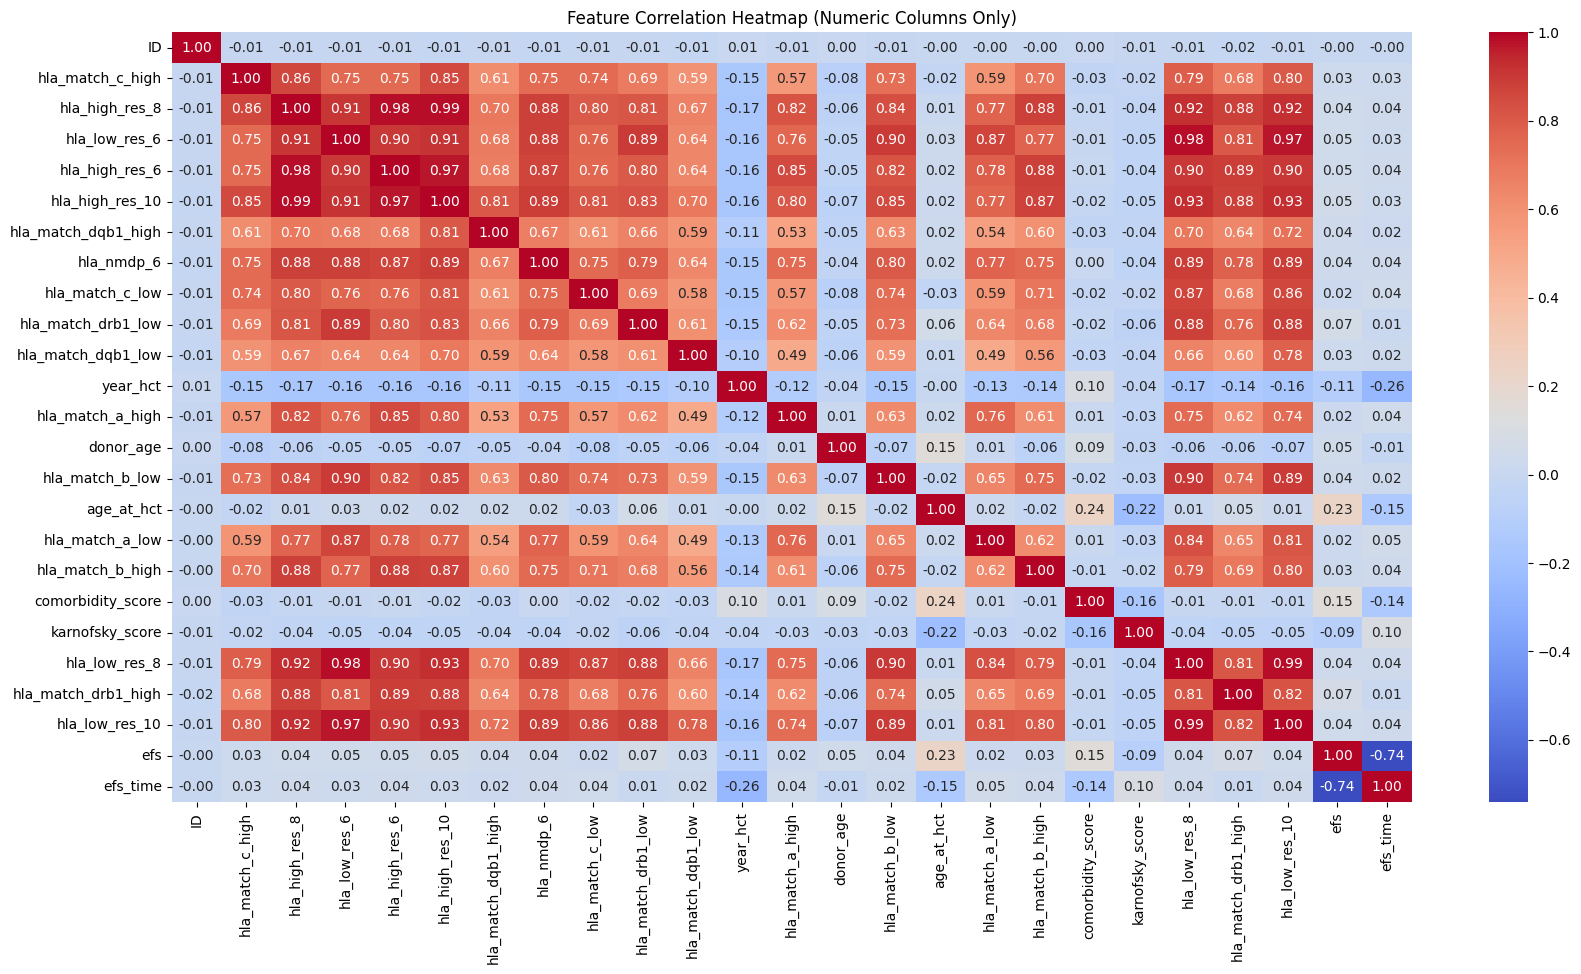

In [9]:
# Correlation heatmap (Selecting only numeric columns)

numeric_train = train.select_dtypes(include=[np.number])

correlation_matrix = numeric_train.corr()

plt.figure(figsize=(20, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap (Numeric Columns Only)')

plt.show()

In [10]:
# Defining features

features = ['efs_time','year_hct','age_at_hct']

# Select columns corresponding to features, and preview the data

# The target
y = train['efs']

y 

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
28795    0.0
28796    1.0
28797    0.0
28798    0.0
28799    0.0
Name: efs, Length: 28800, dtype: float64

In [11]:
X = train[features]

X.head()

,efs_time,year_hct,age_at_hct
0,42.356,2016,9.942
1,4.672,2008,43.705
2,19.793,2019,33.997
3,102.349,2009,43.245
4,16.223,2018,29.740


In [12]:
efs_encoder = LabelEncoder()
y = efs_encoder.fit_transform(y)

In [13]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [14]:
scaler = StandardScaler()
scaler.fit(X)
X  = scaler.transform(X)

In [15]:
X

array([[ 0.77092128,  0.26017508, -1.35815348],
       [-0.74863665, -2.27639984,  0.2384162 ],
       [-0.13890213,  1.21139068, -0.22065138],
       ...,
       [-0.00325324,  0.89431881,  0.58361534],
       [ 1.17395656,  0.89431881, -1.82620569],
       [ 0.07743446,  0.89431881, -1.77934372]])

In [16]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [17]:
print(train_X.shape, train_y.shape)

(24480, 3) (24480,)


In [18]:
print(val_X.shape, val_y.shape)

(4320, 3) (4320,)


In [19]:
train_y = train_y.reshape(-1,1)
val_y = val_y.reshape(-1,1)

In [20]:
print(train_X.shape, train_y.shape)

(24480, 3) (24480, 1)


In [21]:
print(val_X.shape, val_y.shape)

(4320, 3) (4320, 1)


# Logistic Regression

In [22]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [23]:
def compute_cost(predictions, y):
    m = len(y)
    cost = -(1/m) * np.sum([y * np.log(predictions) + (1 - y) * np.log(1 - predictions)])
    return cost

In [24]:
def gradient_descent(X, y, theta, bias, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        predictions = sigmoid(np.dot(X, theta) + bias)
        gradient = (1/m) * np.dot(X.T,(predictions - y))
        theta -= learning_rate * gradient 
        cost = compute_cost(predictions, y)
        cost_history.append(cost)
        
        if i % 1000 == 0:
            print(f"iteration {i}: Cost = {cost}")

    plt.plot(cost_history, label='Error (MSE)')
    plt.title('Error vs. Iterations in Logistic Regression')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid()
    plt.show()
    return theta, cost_history 

In [25]:
def train_logistic_regression(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros((n, 1))  # Initialize weights
    bias = 0

    # Gradient Descent
    theta, cost_history = gradient_descent(X, y, theta, bias, learning_rate, iterations)
    return theta, cost_history

In [26]:
def predict(X, theta, threshold=0.6):
    probabilities = sigmoid(np.dot(X, theta))
    return (probabilities >= threshold).astype(int)

iteration 0: Cost = 0.6931471805599453
iteration 1000: Cost = 0.5735354930244158
iteration 2000: Cost = 0.49628445391038517
iteration 3000: Cost = 0.44221065743876775
iteration 4000: Cost = 0.40198779901962817
iteration 5000: Cost = 0.3707293169387935
iteration 6000: Cost = 0.3456328689137549
iteration 7000: Cost = 0.32497154504915116
iteration 8000: Cost = 0.3076197350535065
iteration 9000: Cost = 0.2928101796306947


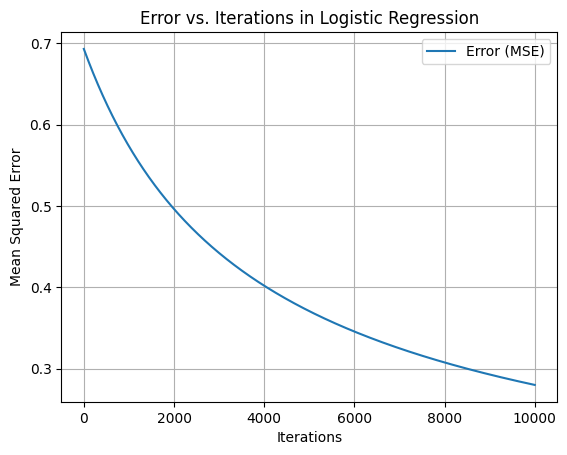

In [27]:
theta, cost_history = train_logistic_regression(train_X, train_y, learning_rate= 0.001, iterations=10000)

In [28]:
predictions = predict(val_X, theta)
    
accuracy = np.mean(predictions == val_y) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Recall Score: {recall_score(val_y, predictions)*100 :.2f}%")

Accuracy: 97.69%
Recall Score: 97.67%


# Creating submission file

In [29]:
output = pd.DataFrame({'Id': train.ID,
                       'efs': train.efs})
output.to_csv('submission.csv', index=False)